## Treatment Resistant Schizophrenia: Load data and characterize

The purpose is to load Bush-Francis catatonia rating scale data, and analyze effects of drug combination.

In [1]:
%matplotlib inline
from IPython.display import display   # To print DataFrames nicely
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns                   # Pretty graphing commands
import time
import sys
root_path = '/home/ec2-user/SageMaker/cascadia-behavioral-healthcare'
sys.path.insert(1, root_path + '/src')
import neural_mech.conc_effect as ce     # Custom code for calculating PK effects
data_path = root_path + '/data' # location of data files

Load the patient symptom data.

In [2]:
data_file_name = 'synth_drug_BF_200_07212022.csv'
szData = pd.read_csv(data_path + '/' + data_file_name)
display(szData.head(2))

,patient,TotalPre,TotalPost,pre_Benztropine,pre_Carbamazepine,pre_Chlorpromazine,pre_Citalopram,pre_Clonazepam,pre_Clozapine,pre_Fluphenazine,...,post_Benztropine,post_Clonazepam,post_Clozapine,post_Valproic_acid,post_Fluvoxamine,post_Lamotrigine,post_Lorazepam,post_Melatonin,post_Olanzapine,post_Sertraline
0,a,24,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.75,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN
1,b,14,5,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,1.0,1.75,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN


Generate data from Gaussian Copula model.

In [7]:
# !pip install sdv
!pip install --no-cache-dir  sdv==0.15.0

     |████████████████████████████████| 102 kB 10.3 MB/s           
     |████████████████████████████████| 46 kB 60.3 MB/s            
     |████████████████████████████████| 45 kB 57.3 MB/s            
     |████████████████████████████████| 53 kB 43.9 MB/s            
     |████████████████████████████████| 1.2 MB 65.9 MB/s            
     |████████████████████████████████| 98 kB 69.8 MB/s            
     |████████████████████████████████| 25.9 MB 47.3 MB/s            
     |████████████████████████████████| 881.9 MB 78.7 MB/s             
     |████████████████████████████████| 23.3 MB 53.3 MB/s            
     |████████████████████████████████| 78 kB 67.5 MB/s            
     |████████████████████████████████| 2.5 MB 52.9 MB/s            
     |████████████████████████████████| 881.9 MB 44.6 MB/s            
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully uninstalled scipy-1.5.3


In [8]:
from sdv.tabular import GaussianCopula

synth_model = GaussianCopula.load(data_path + '/' + 'drug_BF_model_copula_07212022.pkl')
# synth_model = GaussianCopula.load(data_path + '/' + 'drug_BF_model_copula_clientDrugs_04132017.pkl')
szData = synth_model.sample(num_rows=200)
print('Fraction post_Clozapine:', 1 - szData['post_Clozapine'].isnull().sum()/len(szData))
display(szData.head(2))

Fraction post_Clozapine: 0.46499999999999997


,patient,TotalPre,TotalPost,pre_Benztropine,pre_Carbamazepine,pre_Chlorpromazine,pre_Citalopram,pre_Clonazepam,pre_Clozapine,pre_Fluphenazine,...,post_Benztropine,post_Clonazepam,post_Clozapine,post_Valproic_acid,post_Fluvoxamine,post_Lamotrigine,post_Lorazepam,post_Melatonin,post_Olanzapine,post_Sertraline
0,a,19,10,NaN,600.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.69,NaN,NaN,NaN,470.0,NaN,2.0,35.0,NaN
1,b,16,2,2.0,NaN,NaN,NaN,NaN,400.0,NaN,...,2.0,NaN,420.0,NaN,NaN,420.0,1.7,NaN,NaN,NaN


In [11]:
import json

# with open(data_path + '/' + 'init_drug_doses.json', 'r') as f:
with open(data_path + '/' + 'init_drug_doses_0721202.json', 'r') as f:
    drug_doses = json.load(f)
for d in drug_doses.keys():
    print(d, drug_doses[d])

pre_Benztropine [2.0]
pre_Carbamazepine [600.0]
pre_Chlorpromazine [100.0]
pre_Citalopram [20.0]
pre_Clonazepam [3.0, 5.0]
pre_Clozapine [150.0, 400.0, 1000.0]
pre_Fluphenazine [10.0]
pre_Fluvoxamine [25.0]
pre_Ziprasidone [160.0]
pre_Haloperidol [20.0, 30.0, 60.0]
pre_Lamotrigine [50.0, 250.0]
pre_Lorazepam [1.0, 2.0]
pre_Loxapine [50.0, 150.0]
pre_Olanzapine [20.0, 45.0]
pre_Oxcarbazepine [1500.0, 1800.0]
pre_Risperidone [50.0]
pre_Sertraline [100.0, 200.0]
pre_Zolpidem [10.0]
pre_Quetiapine [800.0]
pre_Valproic_acid [750.0, 1000.0, 1250.0, 2000.0]
post_Benztropine [1.0, 2.0]
post_Clonazepam [1.0, 1.5, 1.75, 3.0, 3.5, 4.0, 6.75, 9.0]
post_Clozapine [200.0, 250.0, 350.0, 550.0, 650.0, 800.0, 1050.0]
post_Valproic_acid [250.0]
post_Fluvoxamine [25.0]
post_Lamotrigine [400.0, 450.0, 500.0]
post_Lorazepam [1.5, 2.0, 3.0]
post_Melatonin [2.0]
post_Olanzapine [20.0, 45.0, 50.0]
post_Sertraline [200.0]


In [13]:
def round_drug_doses(drug_doses, synth_drug_BF, verbose=False):
    for col in drug_doses.keys():
        dose_list = drug_doses[col]
        for d in (synth_drug_BF[col].notnull()[synth_drug_BF[col].notnull()]).index:
            dose = synth_drug_BF.loc[d, col]
            synth_drug_BF.loc[d, col] = min(dose_list, key=lambda x:abs(x-dose))
        if verbose: print(col, (list(synth_drug_BF[col].dropna())))
    return synth_drug_BF

def filter_meds(szData, verbose=False):
    patients = szData['patient'].to_list()

    pre_antipsych_all = ['pre_Chlorpromazine', 'pre_Clozapine', 'pre_Fluphenazine', 'pre_Geodon', 'pre_Haldol', 
                     'pre_Loxapine', 'pre_Olanzapine', 'pre_Perphenazine', 'pre_Risperdal', 'pre_quetiapine']
    pre_antipsych = [x for x in pre_antipsych_all if x in szData.keys()]
    pre_benzo = ['pre_Clonazepam', 'pre_Lorazepam', 'pre_Zolpidem']
    pre_mood_all = ['pre_Buproprion', 'pre_Carbamazepine', 'pre_Citalopram', 'pre_Depakote', 'pre_DepakoteEC', 'pre_DivalproexDR',
                'pre_Fluoxetine', 'pre_Fluvoxamine', 'pre_Oxcarbazepine', 'pre_Sertraline', 'pre_Valproic',
               'pre_oxcarbazepine', 'pre_sertraline']
    pre_mood = [x for x in pre_mood_all if x in szData.keys()]

    # (1.1a) Drop rows with non-Nan pre_Clozapine
    szData.drop(szData[szData['pre_Clozapine'].notnull()].index, inplace=True)
    if verbose: print(len(szData), 'pre_Clozapine')

    # (1.1b) Drop rows with non-Nan pre_Lamotrigine
    szData.drop(szData[szData['pre_Lamotrigine'].notnull()].index, inplace=True)
    if verbose: print(len(szData), 'pre_Lamotrigine')

    # (1.1c) rop rows with pre_Olanzapine > 20
    szData.drop(szData[szData['pre_Olanzapine'] > 20].index, inplace=True)
    if verbose: print(len(szData), 'pre_Olanzapine > 20')

    # (1.2) Drop rows with both post_Clozapine and post_Olanzapine
    product_post_antipsych = szData['post_Clozapine'] * szData['post_Olanzapine']
    szData.drop(product_post_antipsych[product_post_antipsych.notnull()].index, inplace=True)
    if verbose: print(len(szData), 'post_Clozapine + post_Olanzapine')

    # (1.3) Drop rows with post_Lamotrigine > 500
    szData.drop(szData[szData['post_Lamotrigine'] > 500].index, inplace=True)
    if verbose: print(len(szData), 'post_Lamotrigine > 500')

    # (1.4a) Drop rows with no pre antipsychotics
    # szData[pre_antipsych].dropna(axis = 0, how = 'all', inplace = True)
    szData.drop(szData[szData[pre_antipsych].isnull().all(1)].index, inplace = True)
    if verbose: print(len(szData), 'pre antipsychotics')

    # (1.4b) Drop rows with no post antipsychotics
    post_antipsych = ['post_Clozapine', 'post_Olanzapine']
    # szData[post_antipsych].dropna(axis = 0, how = 'all', inplace = True)
    szData.drop(szData[szData[post_antipsych].isnull().all(1)].index, inplace = True)
    if verbose: print(len(szData), 'post antipsychotics')

    # (1.5) Drop rows with non-Nan pre_Methylphenidate
    if 'pre_Methylphenidate' in szData.keys():
        szData.drop(szData[szData['pre_Methylphenidate'].notnull()].index, inplace=True)
        if verbose: print(len(szData), 'pre_Methylphenidate')
            
    # Drop rows with TotalPre <= TotalPost
    szData.drop(szData[szData['TotalPre']<=szData['TotalPost']].index, inplace = True)
    if verbose: print(len(szData), 'TotalPre <= TotalPost')

    # Remove BF change < 9
    szData.drop(szData[szData['TotalPre']-szData['TotalPost'] < 9].index, inplace=True)
    if verbose: print(len(szData), 'TotalPre - TotalPost < 9')

    # Drop rows where the number of drugs post is less than 3
    num_post_drugs = list((~szData[[s for s in szData.columns if 'post_' in s]].isnull()).sum(axis=1))
    num_post_lessthan_3 = []
    for i, n in enumerate(num_post_drugs):
        if n<3: num_post_lessthan_3.append(list(szData.index)[i])
    szData.drop(num_post_lessthan_3, inplace=True)
    if verbose: print(len(szData), 'post < 3')

    # Drop rows with both post_Clonazepam and post_Lorazepam 
    product_post_antipsych = szData['post_Clonazepam'] * szData['post_Lorazepam']
    szData.drop(product_post_antipsych[product_post_antipsych.notnull()].index, inplace=True)
    if verbose: print(len(szData), 'post_Clonazepam + post_Lorazepam')
        
    # # Drop rows where the number of drugs pre is less than number of drugs post
    # num_pre_drugs = list((~szData[[s for s in szData.columns if 'pre_' in s]].isnull()).sum(axis=1))
    # num_post_drugs = list((~szData[[s for s in szData.columns if 'post_' in s]].isnull()).sum(axis=1))
    # num_pre_lessthan_post = []
    # for i, n in enumerate(num_pre_drugs):
    #     num_pre_lessthan_post.append(n < num_post_drugs[i])
    # szData.drop(szData[num_pre_lessthan_post].index, inplace=True)
    # if verbose: print(len(szData), 'pre < post')

    # (2.1) Drop rows where pre has more than 1 mood stabilizer
    num_pre_mood = list((~szData[pre_mood].isnull()).sum(axis=1))
    num_mood_greaterthan_1 = []
    for i, n in enumerate(num_pre_mood):
        if n>1: num_mood_greaterthan_1.append(list(szData.index)[i])
    szData.drop(num_mood_greaterthan_1, inplace=True)
    if verbose: print(len(szData), 'mood > 1')

    # (2.2) Drop rows with post_Lamotrigine < 400
    szData.drop(szData[szData['post_Lamotrigine'] < 400].index, inplace=True)
    if verbose: print(len(szData), 'post_Lamotrigine < 400')
    
    # Drop rows where pre has more than 1 benzodiazapine
    num_pre_benzo = list((~szData[pre_benzo].isnull()).sum(axis=1))
    num_benzo_greaterthan_1 = []
    for i, n in enumerate(num_pre_benzo):
        if n>1: num_benzo_greaterthan_1.append(list(szData.index)[i])
    szData.drop(num_benzo_greaterthan_1, inplace=True)
    if verbose: print(len(szData), 'mood > 1')


    # Rename patients in original sequence of letters & reset index
    szData.reset_index(drop=True, inplace=True)
    szData['patient']  = patients[:len(szData)]
    return szData


szData = synth_model.sample(num_rows=800)
szData = round_drug_doses(drug_doses, szData)
szData = filter_meds(szData, verbose=True)


516 pre_Clozapine
370 pre_Lamotrigine
337 pre_Olanzapine > 20
304 post_Clozapine + post_Olanzapine
304 post_Lamotrigine > 500
172 pre antipsychotics
147 post antipsychotics
147 TotalPre <= TotalPost
128 TotalPre - TotalPost < 9
125 post < 3
110 post_Clonazepam + post_Lorazepam
100 mood > 1
100 post_Lamotrigine < 400
95 mood > 1


In [14]:
import random

# Balance post_Clozapine to 80% of sample
print('Fraction of post_Clozapine', 1 - szData['post_Clozapine'].isnull().sum()/len(szData))

num_remove = int(szData['post_Clozapine'].isnull().sum() - 0.2*len(szData))
print('Number to remove:', num_remove)
remove_idx = random.sample(list(szData[szData['post_Clozapine'].isnull()].index), num_remove)
szData.drop(remove_idx, inplace=True)
print('Fraction of post_Clozapine', 1 - szData['post_Clozapine'].isnull().sum()/len(szData))
print(len(szData), 'Remove excess null post_Clozapine')

Fraction of post_Clozapine 0.42105263157894735
Number to remove: 36
Fraction of post_Clozapine 0.6779661016949152
59 Remove excess null post_Clozapine


Save synthesized data for further analysis.

In [16]:
szData.to_csv('synth_drug_BF_'+time.strftime("%Y%m%d-%H%M%S"), index=False)

### Test data features for match with clinical practive and observations.

In [17]:
pre_header = ['patient','TotalPre'] + [s for s in szData.columns if 'pre_' in s]
preTotalBF = szData[pre_header].copy()
preTotalBF.columns = ['patient','pre_total_bf'] + [str(col)[4:] for col in list(preTotalBF.columns)[2:]]
display(preTotalBF.head())

post_header = ['patient','TotalPost'] + [s for s in szData.columns if 'post_' in s]
postTotalBF = szData[post_header].copy()
postTotalBF.columns = ['patient','post_total_bf'] + [str(col)[5:] for col in list(postTotalBF.columns)[2:]]
display(postTotalBF.head())

,patient,pre_total_bf,Benztropine,Carbamazepine,Chlorpromazine,Citalopram,Clonazepam,Clozapine,Fluphenazine,Fluvoxamine,...,Lamotrigine,Lorazepam,Loxapine,Olanzapine,Oxcarbazepine,Risperidone,Sertraline,Zolpidem,Quetiapine,Valproic_acid
0,a,17,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,1250.0
4,e,21,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
5,f,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,1250.0
7,h,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,1000.0


,patient,post_total_bf,Benztropine,Clonazepam,Clozapine,Valproic_acid,Fluvoxamine,Lamotrigine,Lorazepam,Melatonin,Olanzapine,Sertraline
0,a,4,NaN,NaN,NaN,NaN,NaN,450.0,NaN,2.0,20.0,NaN
1,b,12,NaN,4.00,350.0,NaN,NaN,500.0,NaN,NaN,NaN,NaN
4,e,3,NaN,NaN,350.0,NaN,NaN,400.0,2.0,NaN,NaN,NaN
5,f,3,NaN,1.75,350.0,NaN,NaN,400.0,NaN,NaN,NaN,NaN
7,h,8,NaN,NaN,350.0,250.0,NaN,500.0,2.0,NaN,NaN,NaN


In [18]:
for p in list(preTotalBF.index)[:20]:
    print('subject', preTotalBF.loc[p, 'patient'])
    print('BF total (pre/post):', preTotalBF.loc[p, 'pre_total_bf'], 
          '/', postTotalBF.loc[p, 'post_total_bf'])
    print('--- pre drugs ---')
    for col in list(preTotalBF.loc[p].dropna().index)[2:]:
        print(col, preTotalBF.loc[p, col]) 
    print('--- post drugs ---')
    for col in list(postTotalBF.loc[p].dropna().index)[2:]:
        print(col, postTotalBF.loc[p, col]) 
    print()


subject a
BF total (pre/post): 17 / 4
--- pre drugs ---
Citalopram 20.0
Haloperidol 20.0
Loxapine 150.0
--- post drugs ---
Lamotrigine 450.0
Melatonin 2.0
Olanzapine 20.0

subject b
BF total (pre/post): 21 / 12
--- pre drugs ---
Olanzapine 20.0
Valproic_acid 1250.0
--- post drugs ---
Clonazepam 4.0
Clozapine 350.0
Lamotrigine 500.0

subject e
BF total (pre/post): 21 / 3
--- pre drugs ---
Benztropine 2.0
Haloperidol 30.0
Loxapine 50.0
Valproic_acid 1000.0
--- post drugs ---
Clozapine 350.0
Lamotrigine 400.0
Lorazepam 2.0

subject f
BF total (pre/post): 21 / 3
--- pre drugs ---
Loxapine 150.0
Valproic_acid 1250.0
--- post drugs ---
Clonazepam 1.75
Clozapine 350.0
Lamotrigine 400.0

subject h
BF total (pre/post): 18 / 8
--- pre drugs ---
Olanzapine 20.0
Valproic_acid 1000.0
--- post drugs ---
Clozapine 350.0
Valproic_acid 250.0
Lamotrigine 500.0
Lorazepam 2.0

subject i
BF total (pre/post): 12 / 3
--- pre drugs ---
Loxapine 150.0
Oxcarbazepine 1800.0
Risperidone 50.0
Quetiapine 800.0
--- 

**Pooled data statistics**: Statistical significance of change due to 

In [19]:
print( szData.shape, preTotalBF.shape, postTotalBF.shape)
print( 'mean, pre/post:', preTotalBF['pre_total_bf'].mean(), postTotalBF['post_total_bf'].mean())
print ('stdev, pre/post:',preTotalBF['pre_total_bf'].std(), postTotalBF['post_total_bf'].std())
stdev = np.sqrt(preTotalBF['pre_total_bf'].std()**2+postTotalBF['post_total_bf'].std()**2)
effect_size= (preTotalBF['pre_total_bf'].mean()-postTotalBF['post_total_bf'].mean())/stdev
print ('Effect size', effect_size)

from scipy import stats        
f_val, p_val = stats.f_oneway(preTotalBF['pre_total_bf'], postTotalBF['post_total_bf'])  
print ('p-val:', p_val)

(59, 33) (59, 22) (59, 12)
mean, pre/post: 16.983050847457626 4.135593220338983
stdev, pre/post: 3.8751708546259453 2.8735273716836787
Effect size 2.663058242215031
p-val: 2.768350497802346e-40


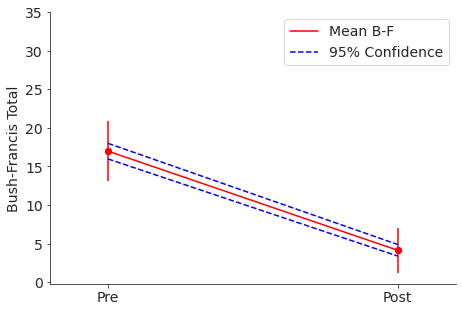

In [20]:
sns.set_style("white")
sns.set_style("ticks")

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(121)
pre_conf = stats.t.interval(0.95, len(preTotalBF['pre_total_bf'])-1, loc=np.mean(preTotalBF['pre_total_bf']), 
              scale=stats.sem(preTotalBF['pre_total_bf']))

post_conf = stats.t.interval(0.95, len(postTotalBF['post_total_bf'])-1, loc=np.mean(postTotalBF['post_total_bf']), 
              scale=stats.sem(postTotalBF['post_total_bf']))

plt.plot([0,1], [preTotalBF['pre_total_bf'].mean(),postTotalBF['post_total_bf'].mean()], 'r', label='Mean B-F')
plt.plot([0,1], [preTotalBF['pre_total_bf'].mean(),postTotalBF['post_total_bf'].mean()], 'or')
plt.plot([0,1], [pre_conf[0],post_conf[0]], '--b', label='95% Confidence')
plt.plot([0,1], [pre_conf[1],post_conf[1]], '--b')
ax.errorbar([0,1], [preTotalBF['pre_total_bf'].mean(),postTotalBF['post_total_bf'].mean()],
                  yerr=[preTotalBF['pre_total_bf'].std(),postTotalBF['post_total_bf'].std()], fmt='or', capthick=2)
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,35)
plt.xticks([0,1])
plt.ylabel('Bush-Francis Total', fontsize=14)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Pre'
labels[1] = 'Post'
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticklabels(labels)
sns.despine()
plt.legend(fontsize=14);

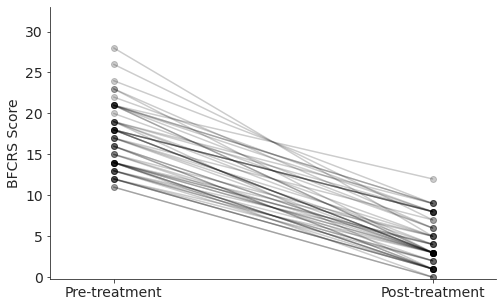

In [21]:
fig, ax1 = plt.subplots(1,1,figsize=(8,5))
for i in preTotalBF['pre_total_bf'].reset_index(drop=True).index:
    ax1.plot([0],preTotalBF['pre_total_bf'].reset_index(drop=True).iloc[i], 'ok', alpha=0.2)
    ax1.plot([1],postTotalBF['post_total_bf'].reset_index(drop=True)[i], 'ok', alpha=0.2)
    ax1.plot([0,1], [preTotalBF['pre_total_bf'].reset_index(drop=True)[i], 
                     postTotalBF['post_total_bf'].reset_index(drop=True)[i]], '-k', alpha=0.2)
ax1.set_xlim(-0.2,1.2)
ax1.set_xticks([0,1])
ax1.set_ylabel('BFCRS Score', fontsize=14)
plt.ylim(-0.2,33)
ax1.tick_params(axis='both', which='major', labelsize=14) 
sns.despine()
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = 'Pre-treatment'
labels[1] = 'Post-treatment'
ax1.set_xticklabels(labels);

No handles with labels found to put in legend.


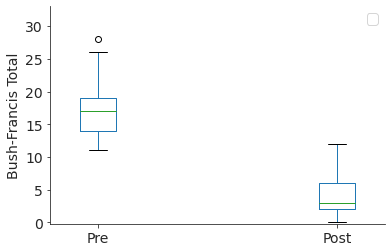

In [22]:
ax = plt.subplot(111)
pooled_BF = pd.DataFrame({'pre':preTotalBF['pre_total_bf'],
                          'post':postTotalBF['post_total_bf']})
pooled_BF[['pre','post']].plot(ax=ax, kind='box', bootstrap=10000)
# sns.despine()
# plt.ylim(0,30);
plt.xlim(1-0.2,2.2)
plt.ylim(-0.2,33)
plt.xticks([1,2])
plt.ylabel('Bush-Francis Total', fontsize=14)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Pre'
labels[1] = 'Post'
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticklabels(labels)
sns.despine()
plt.legend(fontsize=14);

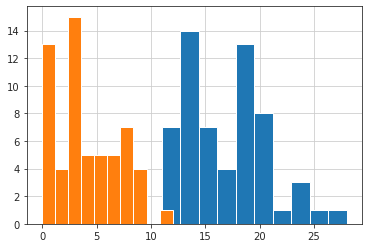

In [23]:
preTotalBF['pre_total_bf'].hist()
postTotalBF['post_total_bf'].hist();

### Drugs and effects on symptoms

In [24]:
display(preTotalBF.head(2))
display(postTotalBF.head(2))

,patient,pre_total_bf,Benztropine,Carbamazepine,Chlorpromazine,Citalopram,Clonazepam,Clozapine,Fluphenazine,Fluvoxamine,...,Lamotrigine,Lorazepam,Loxapine,Olanzapine,Oxcarbazepine,Risperidone,Sertraline,Zolpidem,Quetiapine,Valproic_acid
0,a,17,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,1250.0


,patient,post_total_bf,Benztropine,Clonazepam,Clozapine,Valproic_acid,Fluvoxamine,Lamotrigine,Lorazepam,Melatonin,Olanzapine,Sertraline
0,a,4,NaN,NaN,NaN,NaN,NaN,450.0,NaN,2.0,20.0,NaN
1,b,12,NaN,4.0,350.0,NaN,NaN,500.0,NaN,NaN,NaN,NaN


In [25]:
# print szDrugsPre.count(axis=0)
print ('Number of drugs before:', len(preTotalBF[preTotalBF.keys()[2:]].count(axis=0)))
print ('Mean number of drugs per subject before:', preTotalBF[preTotalBF.keys()[2:]].count(axis=1).mean())
print ('Stdev of drugs per subject before:', preTotalBF[preTotalBF.keys()[2:]].count(axis=1).std())
# print szDrugsPost.count(axis=0)
print ('Number of drugs after:', len(postTotalBF[postTotalBF.keys()[2:]].count(axis=0)))
print( 'Mean number of drugs per subject after:', postTotalBF[postTotalBF.keys()[2:]].count(axis=1).mean())
print ('Stdev of drugs per subject after:', postTotalBF[postTotalBF.keys()[2:]].count(axis=1).std())

Number of drugs before: 20
Mean number of drugs per subject before: 2.9322033898305087
Stdev of drugs per subject before: 1.3879333033222703
Number of drugs after: 10
Mean number of drugs per subject after: 3.542372881355932
Stdev of drugs per subject after: 0.6518417911051805


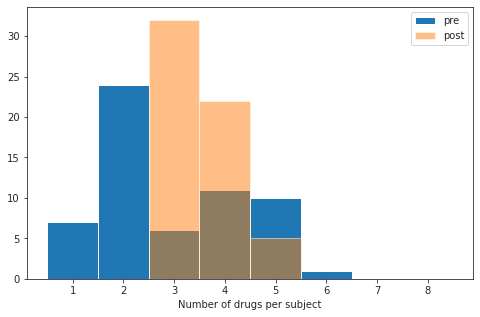

In [26]:
fig = plt.figure(figsize=(8,5))
preTotalBF[preTotalBF.keys()[2:]].count(axis=1).hist(bins=8, range=[0.5,8.5], label='pre')
postTotalBF[postTotalBF.keys()[2:]].count(axis=1).hist(bins=8, range=[0.5,8.5], 
                                                       alpha=0.5, label='post')
plt.grid(b=None)
plt.xlabel('Number of drugs per subject')
plt.legend();

In [27]:
szDrugs_info = pd.read_excel(data_path + '/' + 'drug_info.xlsx', engine='openpyxl')
szDrugs_info.drop(szDrugs_info.index[[1,27,28,29,30]]).T

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,0,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
Drug,Benztropine,Carbamazepine,Chlorpromazine,Citalopram,Clonazepam,Clozapine,Diazepam,Fluphenazine,Fluvoxamine,Haloperidol,...,Olanzapine,Oxcarbazepine,Quetiapine,Risperidone,Sertraline,Trazodone,Trihexyphenidyl,Ziprasidone,Zolpidem,Valproic_acid
Class,anticholinergic (anti-PD),anticonvulsant,antipsychotic,antidepressant,benzodiazepine,antipsychotic,benzodiazepine,antipsychotic,antidepressant,antipsychotic,...,antipsychotic,anticonvulsant,antipsychotic,antipsychotic,antidepressant,antidepressant,anticholinergic (anti-PD),antipsychotic,benzodiazepine,anticonvulsant
MoA,M1-,"Na-, GABA+",D2-,5HT+ (SSRI),GABA+,"D2-,5HT2-,5HT1-,M1-,a1-,a2-",GABA+,"D2-, D1-",5HT+ (SSRI),"D2-,D3-, a1",...,"D2-,5HT2-",Na-,"D2-,5HT2-,a1-,H1-","D2-,5HT2-,a1-",5HT+ (SSRI),5HT+ (SARI),M1-,"D2-,5HT2-",GABA+,"GABA+, PIP3"


In [28]:
pre_count = pd.DataFrame(preTotalBF.count(axis=0))
pre_count = pre_count.drop(pre_count.index[:2])
print (len(pre_count))
# szDrugs_info[szDrugs_info['Drug'].isin(szDrugsPre.count(axis=0).index)]
drug_class = []
moa = []
for d in pre_count.index:
#     print d
    if len(szDrugs_info['Class'][szDrugs_info['Drug']==d].values)==0:
        drug_class.append(np.nan)
        moa.append(np.nan)
    else:
        drug_class.append(szDrugs_info['Class'][szDrugs_info['Drug']==d].values[0])
        moa.append(szDrugs_info['MoA'][szDrugs_info['Drug']==d].values[0])
len(drug_class), drug_class
pre_count['Class'] = drug_class
pre_count['MoA'] = moa
pre_count = pre_count.sort_values('Class')
pre_count.head()

20


,0,Class,MoA
Benztropine,6,anticholinergic (anti-PD),M1-
Oxcarbazepine,7,anticonvulsant,Na-
Lamotrigine,0,anticonvulsant,"Na-,Glu-,Ih-"
Valproic_acid,38,anticonvulsant,"GABA+, PIP3"
Carbamazepine,7,anticonvulsant,"Na-, GABA+"


In [29]:
post_count = pd.DataFrame(postTotalBF.count(axis=0))
post_count = post_count.drop(post_count.index[:2])
print (len(post_count))
# szDrugs_info[szDrugs_info['Drug'].isin(szDrugsPre.count(axis=0).index)]
drug_class = []
moa = []
for d in post_count.index:
    drug_class.append(szDrugs_info['Class'][szDrugs_info['Drug']==d].values[0])
    moa.append(szDrugs_info['MoA'][szDrugs_info['Drug']==d].values[0])
len(drug_class), drug_class
post_count['Class'] = drug_class
post_count['MoA'] = moa
post_count = post_count.sort_values('Class')
# post_count = post_count.ix[:-1]
post_count#.head()

10


,0,Class,MoA
Melatonin,16,-,NaN
Benztropine,18,anticholinergic (anti-PD),M1-
Valproic_acid,3,anticonvulsant,"GABA+, PIP3"
Lamotrigine,59,anticonvulsant,"Na-,Glu-,Ih-"
Fluvoxamine,0,antidepressant,5HT+ (SSRI)
Sertraline,0,antidepressant,5HT+ (SSRI)
Clozapine,40,antipsychotic,"D2-,5HT2-,5HT1-,M1-,a1-,a2-"
Olanzapine,19,antipsychotic,"D2-,5HT2-"
Clonazepam,39,benzodiazepine,GABA+
Lorazepam,15,benzodiazepine,GABA+


In [30]:
print (pre_count['Class'].unique())
post_count = post_count[1:]
print (post_count['Class'].unique())

['anticholinergic (anti-PD)' 'anticonvulsant' 'antidepressant'
 'antipsychotic' 'benzodiazepine']
['anticholinergic (anti-PD)' 'anticonvulsant' 'antidepressant'
 'antipsychotic' 'benzodiazepine']


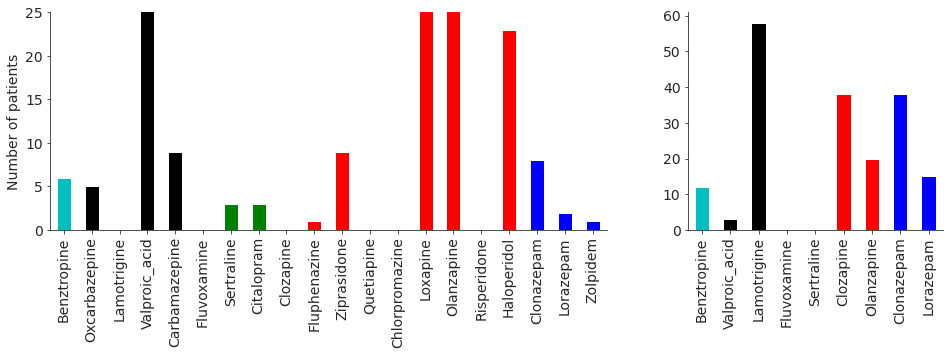

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4), gridspec_kw = {'width_ratios':[24, 11]})
drug_class = pre_count['Class'].unique()
colors = {drug_class[0]: 'c', drug_class[1]: 'k', drug_class[2]: 'g', 
          drug_class[3]: 'r', drug_class[4]: 'b'}
#           drug_class[3]: 'r', drug_class[4]: 'b', drug_class[5]: 'y', drug_class[6]: 'orange'}
colorset = list(pre_count['Class'].map(colors))
pre_count.plot(kind='bar', ax=ax1, color=[colorset], legend=False)
ax1.set_ylim(0,25)
ax1.set_ylabel('Number of patients', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
colorset = list(post_count['Class'].map(colors))
post_count.plot(kind='bar', ax=ax2, color=[colorset], legend=False)
ax2.tick_params(axis='both', which='major', labelsize=14)
sns.despine();